In [33]:
library(TreePar)
library(TreeSim)
library(NELSI)

In [34]:
#set.seed(10)
nspecies <- 200
time <- c(0, 0.5, 1) # At time 1 in the past, there is a rate shift
rho <- c(0.5, 0.5, 1) #half of the present day species are sampled (rho[1] = 0.5)
lambda <- c(1.5, 10, 5)# speciation rates, between t[i] and t[i+1] we have a speciation rate lambda
mu <- c(1.5, 1.5, 1.5)# extinction rate. Similar notation as lambda

#Simulate a tree with a single rate shift
tree <- sim.rateshift.taxa(nspecies, 1, lambda = lambda, mu = mu, frac = rho, times = time, complete = F)

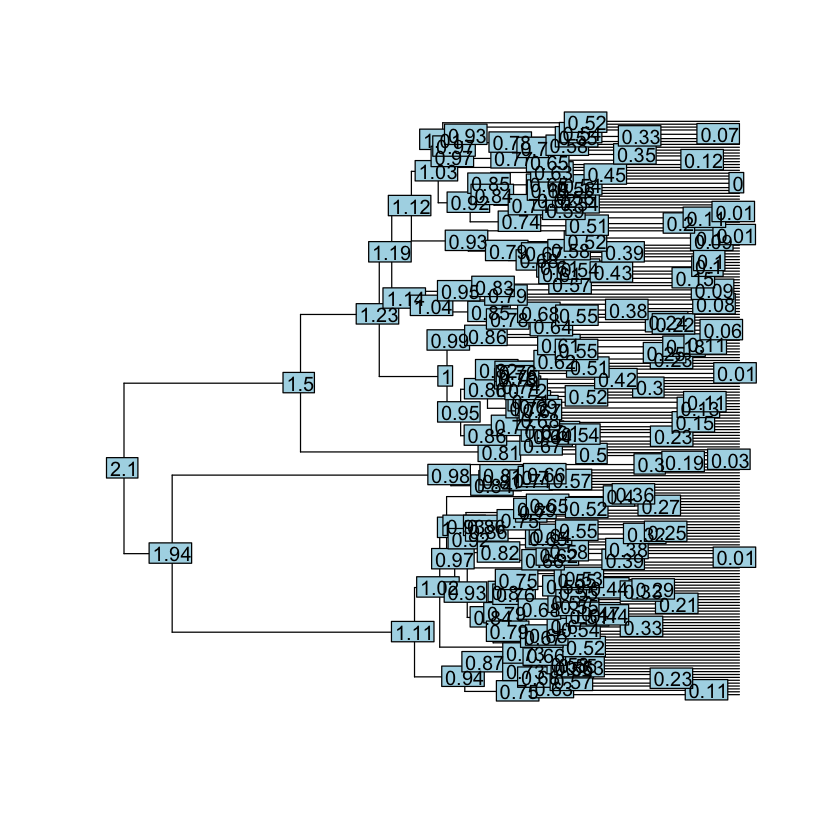

In [35]:
plot(tree[[1]], show.tip.label = F)
nodelabels(round(intnode.times(tree[[1]]), 2))

In [36]:
## Extract speciation times from tree
x <- sort(intnode.times(tree[[1]]), decreasing = T)

In [37]:
# When estimateing the rate shift times, t, based on branching times, x, we allow the shift times to be:
# 0.6, 0.8, 1, 1.2, ... 2.4
start <- 0.4
end <- 2
grid <- 0.2
print(seq(from = start, to = end, by = grid))
res <- bd.shifts.optim(x, c(rho, 1), grid, start, end)[[2]]

[1] 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0
[1] "startest"
[1] "test"
[1] 1.0 0.4
[1]  4.054592e+01  1.057281e+00  8.737090e-07 -8.907676e-02  6.201317e+00
[6]  4.000000e-01
[1] 1.0 0.6
[1] 4.924753e+01 9.304431e-08 6.090688e-01 1.593446e+00 4.347551e+00
[6] 6.000000e-01
[1] 1.0 0.8
[1] 6.936307e+01 1.543739e-08 9.000023e-01 2.118325e+00 1.694073e+00
[6] 8.000000e-01
[1] 1 1
[1] 79.6689548836  0.0005746126  1.0350340244  2.3432819108 -0.5177305121
[6]  1.0000000000
[1] 1.0 1.2
[1] 8.127162e+01 1.683333e-09 8.056642e-01 2.383422e+00 5.533608e-01
[6] 1.200000e+00
[1] 1.0 1.4
[1] 8.157008e+01 1.627248e-08 5.381465e-01 2.376215e+00 9.462631e-01
[6] 1.400000e+00
[1] 1.0 1.6
[1] 8.154349e+01 1.406547e-09 2.533771e-02 2.362732e+00 1.345966e+00
[6] 1.600000e+00
[1] 1.0 1.8
[1] 8.239777e+01 2.179519e-09 2.100221e-03 2.354465e+00 2.380037e+00
[6] 1.800000e+00
[1] 1 2
[1] 8.210642e+01 1.129126e-05 1.243184e-06 2.355201e+00 1.087623e-04
[6] 2.000000e+00
[[1]]
[1] 8.257784e+01 2.956796e-08 2.354342e+00

In [38]:
res
test<-pchisq(2*(res[[2]][1]-res[[3]][1]),3)
test

[[1]]
[1] 8.257784e+01 2.956796e-08 2.354342e+00

[[2]]
[1]  4.054592e+01  1.057281e+00  8.737090e-07 -8.907676e-02  6.201317e+00
[6]  4.000000e-01

[[3]]
[1]  2.993625e+01  1.360380e+00  1.040572e-07  1.067367e+00 -6.432796e-01
[6]  7.030718e+00 -4.507138e-01  4.000000e-01  1.000000e+00

[[4]]
 [1]  2.955988e+01  1.544027e+00  1.171855e-05  1.067595e+00  9.003106e-01
 [6] -1.005605e+00  7.345593e+00 -5.304340e-01  4.189984e-01  4.000000e-01
[11]  1.000000e+00  1.200000e+00

[1] 0.9999052

In [39]:
print(res)
print('Turnovers')
print(res[[2]][2:3])
print('Net diversification')
print(res[[2]][4:5])

# simulation vaules:
# Turnover (extinction/speciation):
mu/lambda

# net diversification
# speciation - extinction
lambda - mu

[[1]]
[1] 8.257784e+01 2.956796e-08 2.354342e+00

[[2]]
[1]  4.054592e+01  1.057281e+00  8.737090e-07 -8.907676e-02  6.201317e+00
[6]  4.000000e-01

[[3]]
[1]  2.993625e+01  1.360380e+00  1.040572e-07  1.067367e+00 -6.432796e-01
[6]  7.030718e+00 -4.507138e-01  4.000000e-01  1.000000e+00

[[4]]
 [1]  2.955988e+01  1.544027e+00  1.171855e-05  1.067595e+00  9.003106e-01
 [6] -1.005605e+00  7.345593e+00 -5.304340e-01  4.189984e-01  4.000000e-01
[11]  1.000000e+00  1.200000e+00

[1] "Turnovers"
[1] 1.057281e+00 8.737090e-07
[1] "Net diversification"
[1] -0.08907676  6.20131707


[1] 1.00 0.15 0.30

[1] 0.0 8.5 3.5

In [40]:
# Fit single 0 rate shift model (i.e underparameterised)
# Calculate lambda and mu:
turnover_est <- res[[1]][2]
net_div_est <- res[[1]][3]

lambda_est <- net_div_est / (1 - turnover_est)
mu_est <- lambda_est * turnover_est

lambda_est
mu_est

[1] 2.354342

[1] 6.961308e-08

In [41]:
# Simulate 100 trees under a constant rate shift model:
constant_sim_trees <- sim.bd.taxa(n = 200, numbsim = 100, lambda = lambda_est, mu = mu_est, frac = rho[1], 
                                  complete = F)

start <- 10
end <- 100
grid <- 5

In [42]:
# Fit a single rate to trees:
constant_likelihoods <- vector()
for(i in 1:length(constant_sim_trees)){
    tr_times <- sort(intnode.times(constant_sim_trees[[i]]), decreasing = T)
    lik_temp <- bd.shifts.optim(tr_times, sampling = rho, start = start, end = end, grid = grid)[[2]]
    constant_likelihoods[i] <- lik_temp[[1]][1]
}

[1] "startest"
[1] "test"
[1]  1 10
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 10.0000000
[1]  1 15
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 15.0000000
[1]  1 20
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 20.0000000
[1]  1 25
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 25.0000000
[1]  1 30
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 30.0000000
[1]  1 35
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 35.0000000
[1]  1 40
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 40.0000000
[1]  1 45
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 45.0000000
[1]  1 50
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 50.0000000
[1]  1 55
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 55.0000000
[1]  1 60
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 60.0000000
[1]  1 65
[1] 84.3794562  0.1001279  0.2458986  2.3195011  2.4730102 65.0000000
[1]  1 70
[1] 

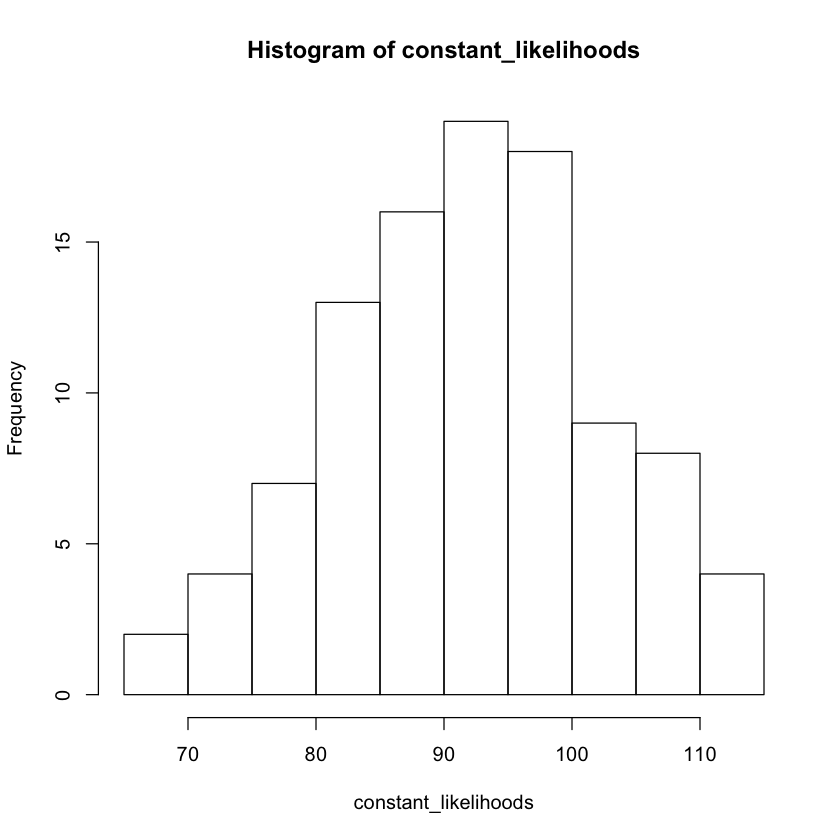

In [43]:
hist(constant_likelihoods)

In [44]:
sum(res[[1]][1] < constant_likelihoods)

[1] 81

In [45]:
lik_temp

[[1]]
[1] 8.866996e+01 6.746567e-06 2.360851e+00

[[2]]
[1] 8.866995e+01 1.675640e-07 1.200121e-01 2.360859e+00 2.476930e+00
[6] 1.000000e+01

[[3]]
[1] 8.866995e+01 1.675640e-07 1.200121e-01 1.200121e-01 2.360859e+00
[6] 2.476930e+00 2.476930e+00 1.000000e+01 1.500000e+01

In [46]:
res

[[1]]
[1] 8.257784e+01 2.956796e-08 2.354342e+00

[[2]]
[1]  4.054592e+01  1.057281e+00  8.737090e-07 -8.907676e-02  6.201317e+00
[6]  4.000000e-01

[[3]]
[1]  2.993625e+01  1.360380e+00  1.040572e-07  1.067367e+00 -6.432796e-01
[6]  7.030718e+00 -4.507138e-01  4.000000e-01  1.000000e+00

[[4]]
 [1]  2.955988e+01  1.544027e+00  1.171855e-05  1.067595e+00  9.003106e-01
 [6] -1.005605e+00  7.345593e+00 -5.304340e-01  4.189984e-01  4.000000e-01
[11]  1.000000e+00  1.200000e+00